Extractive summarization 

In [14]:
pip install gensim==3.4.0

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:



import bs4 as bs # BeautifulSoup 
import urllib.request
import re
import nltk
import collections
import numpy as np
import re
import pandas as pd
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer 
from nltk.tokenize import sent_tokenize 

from gensim.summarization.summarizer import summarize
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ANSHU\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ANSHU\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ANSHU\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
# Web Scraping 
def _scrape_webpage(url): 
 
  scraped_textdata = urllib.request.urlopen(url) 
  textdata = scraped_textdata.read()
  parsed_textdata = bs.BeautifulSoup(textdata,'lxml') 
  paragraphs = parsed_textdata.find_all('p') 
  formated_text = ""
  
  for para in paragraphs:
    formated_text += para.text
  return formated_text


random_text = _scrape_webpage('https://en.wikipedia.org/wiki/Wikipedia:Unusual_articles#Physics').lower()
print(random_text[:1500])

of the over six million articles in the english wikipedia there are some articles that wikipedians have identified as being somewhat unusual. these articles are verifiable, valuable contributions to the encyclopedia, but are a bit odd, whimsical, or something one would not expect to find in encyclopædia britannica. we should take special care to meet the highest standards of an encyclopedia with these articles lest they make wikipedia appear idiosyncratic. if you wish to add an article to this list, the article in question should preferably meet one or more of these criteria:
this definition is not precise or absolute; some articles could still be considered unusual even if they do not fit these guidelines.
each entry on this list should be an article on its own (not merely a section in a less unusual article) and of decent quality, and in large meeting wikipedia's manual of style. for unusual contributions that are of greater levity, see wikipedia:silly things.
in this list, a star ()

**Process the data **

In [17]:
#Tokenizing , removing stop words , punctuation etc 


In [21]:
# Function to sort and group together variant forms of the same word . 
# Stemmer - process of reducing a word to its word stem that adds to suffixes and prefixes or to the roots of words
def process(stopwords_tokens):
  processed = []
  stemmer = PorterStemmer()
  lemmatizer = WordNetLemmatizer()
  for x,test_word in enumerate(stopwords_tokens):
    word_stem = stemmer.stem(test_word)
    word_lemmatise = lemmatizer.lemmatize(word_stem)
    processed.append(word_lemmatise)
  return processed
# Here process is basically lemmatizing - grouping together , so that it can be analysed as single item 

In [22]:
#Text proceccing function
def process_text(random_text):
  tokenizer = RegexpTokenizer(r'[^\d\W]+')
  regexp_tokens = tokenizer.tokenize(random_text.lower())
  stopwords_tokens = [token for token in regexp_tokens if token not in stopwords.words('english')]
  return stopwords_tokens

In [23]:
#Call functions
processed = process_text(random_text)
processed = process(processed)


<FreqDist with 147 samples and 184 outcomes>
[('articl', 11), ('wikipedia', 6), ('unusu', 5), ('list', 4), ('one', 3), ('meet', 3), ('see', 3), ('million', 2), ('contribut', 2), ('encyclopedia', 2), ('question', 2), ('fit', 2), ('indic', 2), ('featur', 2), ('name', 2)]


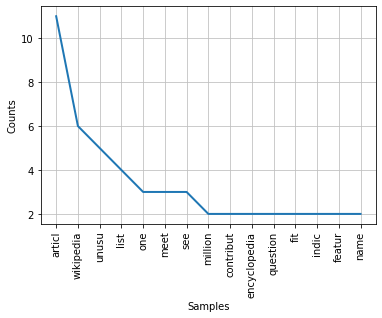

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [24]:
#List and plot the top 15 words
freq_dist = nltk.FreqDist(processed) 
print(freq_dist)
k = 15
print(freq_dist.most_common(k)) 
freq_dist.plot(k)

# Weighted Frequency 

In [ ]:
#Sometimes we would like a word to have more weight based on its semantics. 
#In order to find the weighted mean, we need to multiply the count of words by its weight and add up the results.

In [25]:
DF_Weighted_frequency = pd.DataFrame(columns=["WORD", "W_FREQUENCY"])

for word, frequency in freq_dist.most_common(k):
  DF_Weighted_frequency = DF_Weighted_frequency.append({'WORD': word, 'W_FREQUENCY': frequency}, ignore_index=True)

In [26]:
DF_Weighted_frequency

,WORD,W_FREQUENCY
0,articl,11
1,wikipedia,6
2,unusu,5
3,list,4
4,one,3
5,meet,3
6,see,3
7,million,2
8,contribut,2
9,encyclopedia,2


In [27]:
#Sentence Tokenizing  - process of splitting text into individual sentences
def sent_tokenize_processing(random_text):
  processed_sent_list = []
  sent_tokens = sent_tokenize(random_text)
  for sentence in sent_tokens:
    processed_sent = process_text(sentence)
    processed_sent = process(processed_sent)
    processed_sent_list.append(processed_sent)
  return processed_sent_list

processed_sent_list = sent_tokenize_processing(random_text)
print("# of sentences: ", len(processed_sent_list)) 
processed_sent_list[:15]

# of sentences:  15


[['six',
  'million',
  'articl',
  'english',
  'wikipedia',
  'articl',
  'wikipedian',
  'identifi',
  'somewhat',
  'unusu'],
 ['articl',
  'verifi',
  'valuabl',
  'contribut',
  'encyclopedia',
  'bit',
  'odd',
  'whimsic',
  'someth',
  'one',
  'would',
  'expect',
  'find',
  'encyclopædia',
  'britannica'],
 ['take',
  'special',
  'care',
  'meet',
  'highest',
  'standard',
  'encyclopedia',
  'articl',
  'lest',
  'make',
  'wikipedia',
  'appear',
  'idiosyncrat'],
 ['wish',
  'add',
  'articl',
  'list',
  'articl',
  'question',
  'prefer',
  'meet',
  'one',
  'criterion',
  'definit',
  'precis',
  'absolut',
  'articl',
  'could',
  'still',
  'consid',
  'unusu',
  'even',
  'fit',
  'guidelin'],
 ['entri',
  'list',
  'articl',
  'mere',
  'section',
  'le',
  'unusu',
  'articl',
  'decent',
  'qualiti',
  'larg',
  'meet',
  'wikipedia',
  'manual',
  'style'],
 ['unusu',
  'contribut',
  'greater',
  'leviti',
  'see',
  'wikipedia',
  'silli',
  'thing'],
 ['l

In [37]:
#Calculating doc_id

# We need to iterate through all the words in all the document(sentences) 
# store the document id’s for each word
#  create a set if the word doesn’t have a set yet else add to the set. 
# condition is checked by the try block
# processed is the body of the document

doc_id = {}
for i in range(len(processed_sent_list)):
    tokens = processed_sent_list[i]
    for w in tokens:
        try:
            doc_id[w].add(i)
        except:
            doc_id[w] = {i}
 

In [38]:
doc_id

{'six': {0},
 'million': {0, 13},
 'articl': {0, 1, 2, 3, 4, 6, 7},
 'english': {0},
 'wikipedia': {0, 2, 4, 5, 11},
 'wikipedian': {0},
 'identifi': {0},
 'somewhat': {0},
 'unusu': {0, 3, 4, 5, 11},
 'verifi': {1},
 'valuabl': {1},
 'contribut': {1, 5},
 'encyclopedia': {1, 2},
 'bit': {1},
 'odd': {1},
 'whimsic': {1},
 'someth': {1},
 'one': {1, 3, 13},
 'would': {1},
 'expect': {1},
 'find': {1},
 'encyclopædia': {1},
 'britannica': {1},
 'take': {2},
 'special': {2},
 'care': {2},
 'meet': {2, 3, 4},
 'highest': {2},
 'standard': {2},
 'lest': {2},
 'make': {2},
 'appear': {2},
 'idiosyncrat': {2},
 'wish': {3},
 'add': {3},
 'list': {3, 4, 6, 10},
 'question': {3, 11},
 'prefer': {3},
 'criterion': {3},
 'definit': {3},
 'precis': {3},
 'absolut': {3},
 'could': {3},
 'still': {3},
 'consid': {3},
 'even': {3},
 'fit': {3, 8},
 'guidelin': {3},
 'entri': {4},
 'mere': {4},
 'section': {4},
 'le': {4},
 'decent': {4},
 'qualiti': {4},
 'larg': {4},
 'manual': {4},
 'style': {4},


In [30]:
#This is basically then count of unique words in the document.



In [39]:
len(doc_id) 
#will give the unique words

147

In [40]:
# doc_id will have the word as the key and list of document id’s as the value
# for doc_id we don’t actually need the list of docs, we just need the count. 
# so we are going to replace the list with its count.
for i in doc_id:
  doc_id[i] = len(doc_id[i])
doc_id

{'six': 1,
 'million': 2,
 'articl': 7,
 'english': 1,
 'wikipedia': 5,
 'wikipedian': 1,
 'identifi': 1,
 'somewhat': 1,
 'unusu': 5,
 'verifi': 1,
 'valuabl': 1,
 'contribut': 2,
 'encyclopedia': 2,
 'bit': 1,
 'odd': 1,
 'whimsic': 1,
 'someth': 1,
 'one': 3,
 'would': 1,
 'expect': 1,
 'find': 1,
 'encyclopædia': 1,
 'britannica': 1,
 'take': 1,
 'special': 1,
 'care': 1,
 'meet': 3,
 'highest': 1,
 'standard': 1,
 'lest': 1,
 'make': 1,
 'appear': 1,
 'idiosyncrat': 1,
 'wish': 1,
 'add': 1,
 'list': 4,
 'question': 2,
 'prefer': 1,
 'criterion': 1,
 'definit': 1,
 'precis': 1,
 'absolut': 1,
 'could': 1,
 'still': 1,
 'consid': 1,
 'even': 1,
 'fit': 2,
 'guidelin': 1,
 'entri': 1,
 'mere': 1,
 'section': 1,
 'le': 1,
 'decent': 1,
 'qualiti': 1,
 'larg': 1,
 'manual': 1,
 'style': 1,
 'greater': 1,
 'leviti': 1,
 'see': 3,
 'silli': 1,
 'thing': 1,
 'star': 1,
 'indic': 2,
 'featur': 2,
 'plu': 1,
 'good': 1,
 'nomin': 1,
 'determin': 1,
 'idea': 1,
 'peopl': 1,
 'gravit': 1,
 '

In [41]:
# Unique words
total_unique = [x for x in doc_id]
print(total_unique)

['six', 'million', 'articl', 'english', 'wikipedia', 'wikipedian', 'identifi', 'somewhat', 'unusu', 'verifi', 'valuabl', 'contribut', 'encyclopedia', 'bit', 'odd', 'whimsic', 'someth', 'one', 'would', 'expect', 'find', 'encyclopædia', 'britannica', 'take', 'special', 'care', 'meet', 'highest', 'standard', 'lest', 'make', 'appear', 'idiosyncrat', 'wish', 'add', 'list', 'question', 'prefer', 'criterion', 'definit', 'precis', 'absolut', 'could', 'still', 'consid', 'even', 'fit', 'guidelin', 'entri', 'mere', 'section', 'le', 'decent', 'qualiti', 'larg', 'manual', 'style', 'greater', 'leviti', 'see', 'silli', 'thing', 'star', 'indic', 'featur', 'plu', 'good', 'nomin', 'determin', 'idea', 'peopl', 'gravit', 'toward', 'career', 'name', 'e', 'g', 'urologist', 'splat', 'weedon', 'also', 'internet', 'meme', 'afraid', 'tackl', 'tough', 'pictur', 'contain', 'imag', 'lawn', 'mower', 'race', 'train', 'wreck', 'montparnass', 'agassiz', 'statu', 'stanford', 'univers', 'california', 'april', 'grenvil',

In [34]:
# tf_idf - frequency–inverse document frequency
#  numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus

#Calculating td_idf



In [35]:
#Number of sentences (documents)
len(processed_sent_list)

15

In [42]:
#Calculating tf_idf
#math formula
#tf(t,d) = count of t in d / number of words in d
#Document Frequency
#df(t) = occurrence of t in documents
#Inverse Document Frequency
#idf(t) = N/df


# Creating an empty Dataframe with column names only
df_tf_idf = pd.DataFrame(columns=['WORD', 'TF_IDF'])


N = len(processed_sent_list)
tf_idf = {}
thisdict = {}
for i in range(N):
  tokens = processed_sent_list[i]
  counter = collections.Counter(tokens)
  len(processed_sent_list[i])
  for token in np.unique(tokens):
    #This measures the frequency of a word in a document
    tf = counter[token]/len(processed_sent_list[i])
    df = doc_id[token]
    #IDF is the inverse of the document frequency which measures the informativeness of term t
    idf = np.log(N/(df+1)) #As we cannot divide by 0, we smoothen the value by adding 1 to the denominator
    #Finally, by taking a multiplicative value of TF and IDF, we get the TF-IDF score
    tf_idf[token] = tf*idf

    thisdict.update( {token : tf_idf[token]} )
    df_tf_idf =  df_tf_idf.append({'WORD': token, 'TF_IDF': tf_idf[token]}, ignore_index=True)

10

15

13

21

15

8

5

4

12

4

5

11

11

32

18

In [43]:
df_tf_idf

,WORD,TF_IDF
0,articl,0.125722
1,english,0.201490
2,identifi,0.201490
3,million,0.160944
4,six,0.201490
...,...,...
174,profession,0.111939
175,regurgit,0.111939
176,tartari,0.111939
177,veget,0.111939


In [45]:
# Calculating tf_idf

In [46]:
#tf(t,d) = count of t in d / number of words in d

In [47]:
#Build a summary based on ratio, sentence or word count , etc

In [48]:
#Summarize based on ratio
print(summarize(random_text, ratio=0.10))

of the over six million articles in the english wikipedia there are some articles that wikipedians have identified as being somewhat unusual.
each entry on this list should be an article on its own (not merely a section in a less unusual article) and of decent quality, and in large meeting wikipedia's manual of style.
in this list, a star () indicates a featured article.


In [49]:
#Summarize based on word count
print(summarize(random_text, word_count=30))

each entry on this list should be an article on its own (not merely a section in a less unusual article) and of decent quality, and in large meeting wikipedia's manual of style.


In [50]:
#Summarize the same text data using Gensim with TextRank

In [52]:
from gensim.summarization import keywords


print('Summary:')
print(summarize(random_text, ratio=0.10))

df_Gensim = pd.DataFrame(columns=["Gensim_Text_Rank"])
df_Gensim['Gensim_Text_Rank'] = keywords(random_text, split=True)

print('\nKeywords:')
print(df_Gensim)

Summary:
of the over six million articles in the english wikipedia there are some articles that wikipedians have identified as being somewhat unusual.
each entry on this list should be an article on its own (not merely a section in a less unusual article) and of decent quality, and in large meeting wikipedia's manual of style.
in this list, a star () indicates a featured article.

Keywords:
   Gensim_Text_Rank
0         wikipedia
1           unusual
2          articles
3           article
4              meet
5           meeting
6             names
7             named
8               odd
9         indicates
10         featured
11             dali
12         salvador
13   flat earth map
14             tank
15          narrows
16           statue
17             flaw
18            train
19            hadji
20         valuable


In [53]:
# using the Natural Language Toolkit to process the text information and regular expressions to preprocess the data
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize,sent_tokenize
from collections import defaultdict

import bs4 as BS
import urllib.request


In [54]:
#parsing the data 
data_parsed = BS.BeautifulSoup(random_text,'html.parser')

print(data_parsed)

of the over six million articles in the english wikipedia there are some articles that wikipedians have identified as being somewhat unusual. these articles are verifiable, valuable contributions to the encyclopedia, but are a bit odd, whimsical, or something one would not expect to find in encyclopædia britannica. we should take special care to meet the highest standards of an encyclopedia with these articles lest they make wikipedia appear idiosyncratic. if you wish to add an article to this list, the article in question should preferably meet one or more of these criteria:
this definition is not precise or absolute; some articles could still be considered unusual even if they do not fit these guidelines.
each entry on this list should be an article on its own (not merely a section in a less unusual article) and of decent quality, and in large meeting wikipedia's manual of style. for unusual contributions that are of greater levity, see wikipedia:silly things.
in this list, a star ()

In [56]:
#Create a dictionary table of weighted frequencies of words

def create_freq_dictionary(content):
    
    #stop words
    stop_words = set(stopwords.words('english'))
    
    words = word_tokenize(content)
    
    #Instantiate stemmer 
    # Stemming refers to the removal of any suffixes (and sometimes other affixes) from an input word to produce a stem
    
    stemmer = PorterStemmer()
    
    freq_dict = defaultdict(int)
    
    weighted_freq_dict = dict()
    
    #Build the dictionary by looping through the words
    
    for word in words:
        
        if word in stop_words:
            continue
        freq_dict[word]+=1
        
    #Find the maximum value of frequencies to find the weighted values
    dict_values = freq_dict.values()
    
    max_value = max(dict_values)
    
    for word in freq_dict.keys():
        weighted_freq_dict[word] = freq_dict[word]/max_value
        
    return weighted_freq_dict

In [57]:
#Calculate scores for each sentence 

def get_sentence_scores(sentences,weighted_word_frequency_dict):
    
    sentence_score = defaultdict(int)
    
    for sentence in sentences:
        sentence_length = 0
        
        for word in weighted_word_frequency_dict:
            if word in sentence.lower():
                sentence_length = sentence_length + 1
                
                sentence_score[sentence[:10]] += weighted_word_frequency_dict[word]
        
        #Normalize the sentence weight by the length of the sentence
        sentence_score[sentence[:10]] = sentence_score[sentence[:10]]/sentence_length
    
    return sentence_score
    

In [58]:
#Set the threshold value = Average sentence score

def get_average_sentence_score(sentence_score):
    
    sum_scores = 0 
    
    for sent , score in sentence_score.items():
        sum_scores += score
        
    average_score = sum_scores/len(sentence_score)
    
    return average_score

In [59]:
#Generate Summary

def get_summary_sentences(sentences,sentence_score,threshold):
    
    num_sentences = 0
    
    summary = ''
    
    for sentence in sentences:
        if sentence[:10] in sentence_score:
            if sentence_score[sentence[:10]] >= threshold:
                num_sentences = num_sentences + 1
                summary += sentence
                
    print("The number of sentences in the summary : ",num_sentences)
    
    return summary

In [60]:
#Generate the summary by calling the above utility functions
def generate_summary(content):
    
    #Build weighted dictionary of words
    weighted_word_frequency_dict = create_freq_dictionary(content)
    
    #Tokenize content into sentences
    
    sentences = sent_tokenize(content)
    
    print("The number of sentences in the original article : " , len(sentences))
    
    #Compute sentence_scores
    
    sentence_scores = get_sentence_scores(sentences,weighted_word_frequency_dict)
    
    #Get the threshold score
    
    threshold = get_average_sentence_score(sentence_scores)
    
    #Create the summary
    
    summary = get_summary_sentences(sentences,sentence_scores,threshold)
    
    return summary
    

In [62]:
#Main function 

if __name__ == '__main__':
    summary = generate_summary(random_text)
    
    print("Generated Summary : ")
    
    print(summary)

The number of sentences in the original article :  15
The number of sentences in the summary :  6
Generated Summary : 
of the over six million articles in the english wikipedia there are some articles that wikipedians have identified as being somewhat unusual.for unusual contributions that are of greater levity, see wikipedia:silly things.in this list, a star () indicates a featured article.a plus () indicates a good article.urologists named splat and weedon.see also list of internet memes.
